      lead_source  total_leads  with_opportunity  without_opportunity  \
2  Email Campaign          117                99                   18   
1    Social Media          100                83                   17   
0      Trade Show           98                89                    9   
4        Referral           84                76                    8   
5   Phone Inquiry           22                18                    4   
3             Web           21                19                    2   
6         Partner           18                15                    3   

   conversion_rate  avg_deal_value  
2        84.615385    23282.828283  
1        83.000000    20626.506024  
0        90.816327    21449.438202  
4        90.476190    20013.157895  
5        81.818182    23222.222222  
3        90.476190    25473.684211  
6        83.333333    30466.666667  


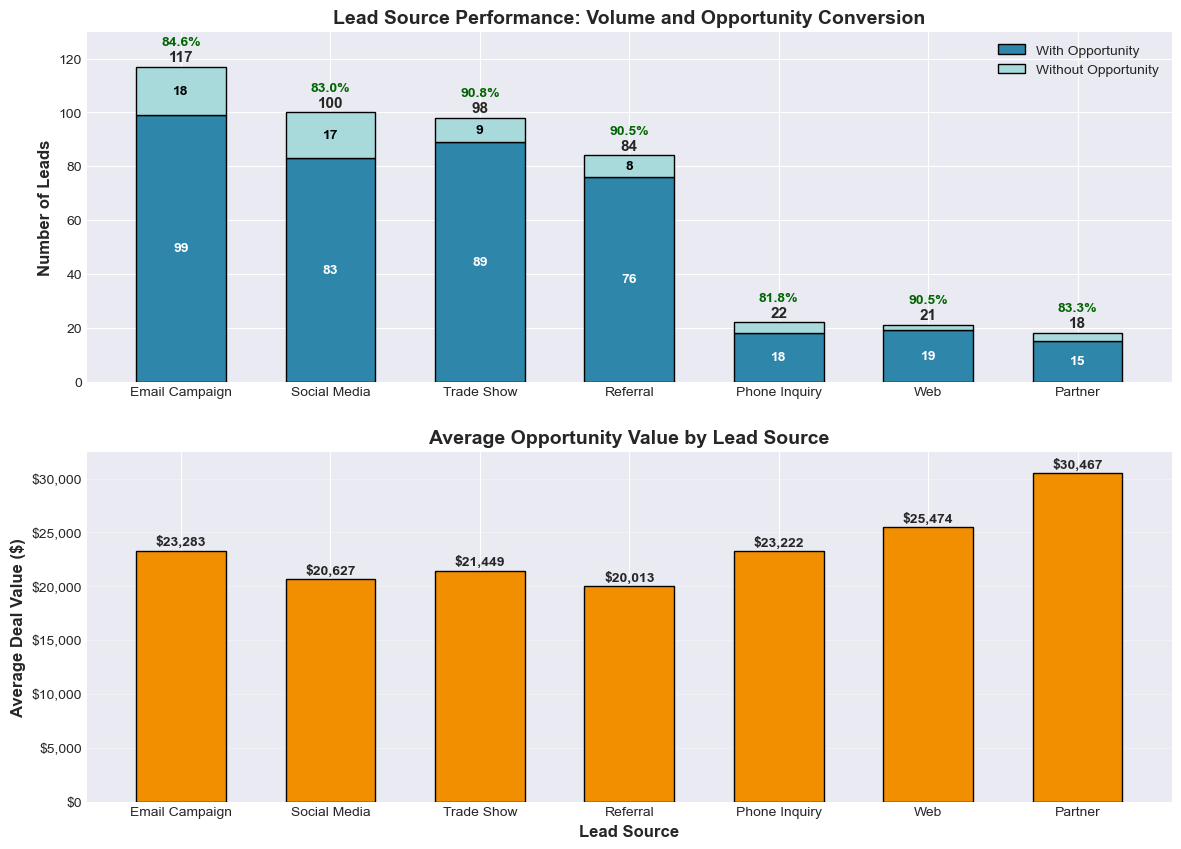

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CleanSalesforceData.csv')

lead_source_metrics = []

lead_sources = df[df['lead_source'].notna()]['lead_source'].unique()

for source in lead_sources:
    source_data = df[df['lead_source'] == source]
    
    total_leads = len(source_data)
    
    # Records with opportunity_amount
    with_opportunity = source_data[source_data['opportunity_amount'].notna()]
    opportunity_count = len(with_opportunity)
    
    no_opportunity = total_leads - opportunity_count
    
    # Conversion rate
    conversion_rate = (opportunity_count / total_leads * 100)
    
    # Average deal value
    avg_deal_value = with_opportunity['opportunity_amount'].mean()
    
    lead_source_metrics.append({
        'lead_source': source,
        'total_leads': total_leads,
        'with_opportunity': opportunity_count,
        'without_opportunity': no_opportunity,
        'conversion_rate': conversion_rate,
        'avg_deal_value': avg_deal_value
    })

# New data frame sorted by total leads
metrics_df = pd.DataFrame(lead_source_metrics)
metrics_df = metrics_df.sort_values('total_leads', ascending=False)
print(metrics_df)

# Create the visualization with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Stacked bar chart
x = np.arange(len(metrics_df))
width = 0.6

bars1 = ax1.bar(x, metrics_df['with_opportunity'], width, 
                label='With Opportunity', color='#2E86AB', edgecolor='black', linewidth=1)
bars2 = ax1.bar(x, metrics_df['without_opportunity'], width, 
                bottom=metrics_df['with_opportunity'],
                label='Without Opportunity', color='#A8DADC', edgecolor='black', linewidth=1)

# Total count label
for i, (total, source) in enumerate(zip(metrics_df['total_leads'], metrics_df['lead_source'])):
    ax1.text(i, total + 2, f'{int(total)}', ha='center', fontweight='bold', fontsize=11)
    
    # Conversion rate label
    conv_rate = metrics_df.iloc[i]['conversion_rate']
    ax1.text(i, total + 8, f'{conv_rate:.1f}%', ha='center', 
             fontsize=10, color='darkgreen', fontweight='bold')

# Axis labels and legend
ax1.set_ylabel('Number of Leads', fontsize=12, fontweight='bold')
ax1.set_title('Lead Source Performance: Volume and Opportunity Conversion', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_df['lead_source'])
ax1.legend(loc='upper right', fontsize=10)
ax1.set_ylim(0, 130)

# Add value labels inside the stacked bars
for i, (with_opp, without_opp) in enumerate(zip(metrics_df['with_opportunity'], 
                                                  metrics_df['without_opportunity'])):
    ax1.text(i, with_opp/2, f'{int(with_opp)}', 
            ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    if without_opp > 5:
        ax1.text(i, with_opp + without_opp/2, f'{int(without_opp)}', 
                ha='center', va='center', fontweight='bold', color='black', fontsize=10)

# Average deal value
bars3 = ax2.bar(x, metrics_df['avg_deal_value'], width, 
                color='#F18F01', edgecolor='black', linewidth=1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars3, metrics_df['avg_deal_value'])):
    ax2.text(bar.get_x() + bar.get_width()/2, value + 500,
            f'${value:,.0f}', ha='center', fontweight='bold', fontsize=10)

# Axis labels and legend
ax2.set_xlabel('Lead Source', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Deal Value ($)', fontsize=12, fontweight='bold')
ax2.set_title('Average Opportunity Value by Lead Source', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_df['lead_source'])
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 32500)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

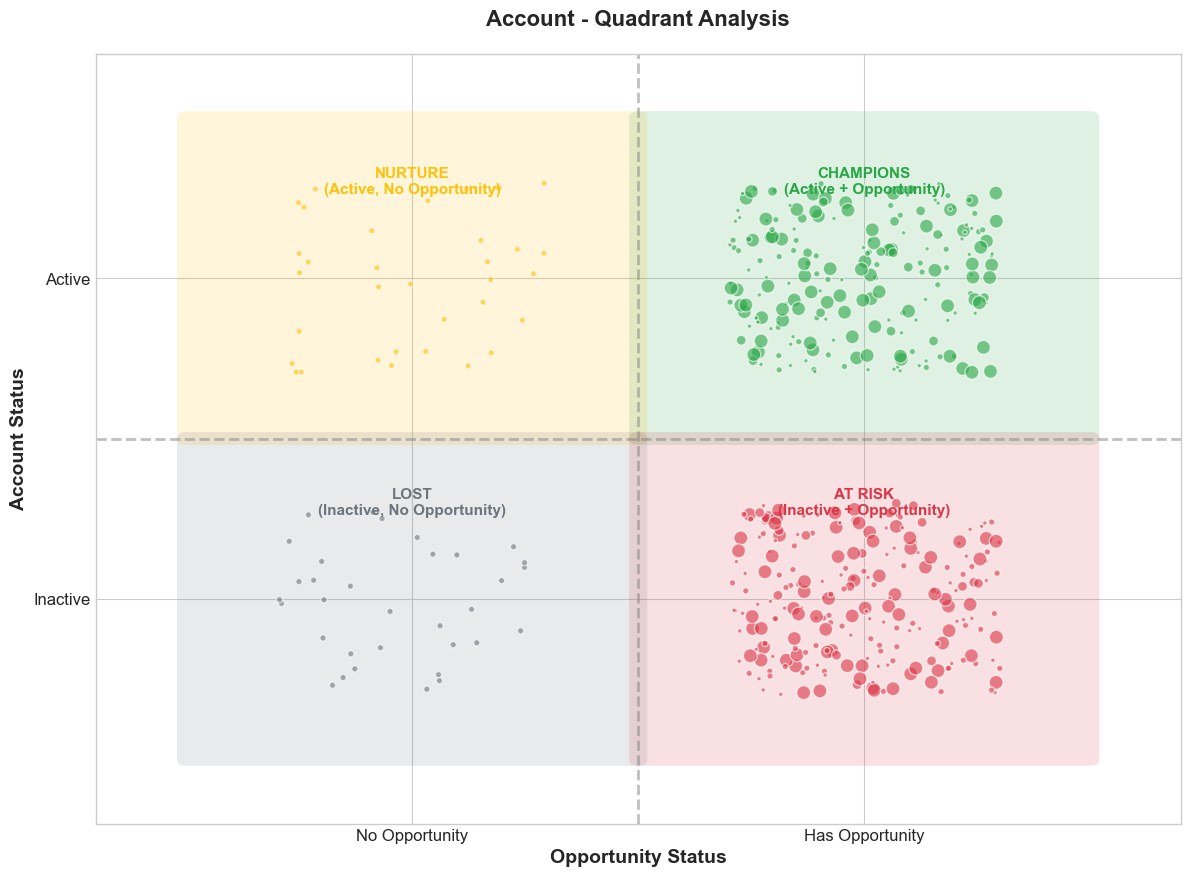

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch



# Read the dataset
df = pd.read_csv('CleanSalesforceData.csv')

# Indicators
df['has_opportunity'] = df['opportunity_amount'].notna()
df['is_active_bool'] = df['is_active'] == True

# Quadrants
quadrants = {
    'Champions': df[(df['is_active_bool'] == True) & (df['has_opportunity'] == True)],
    'Nurture': df[(df['is_active_bool'] == True) & (df['has_opportunity'] == False)],
    'At Risk': df[(df['is_active_bool'] == False) & (df['has_opportunity'] == True)],
    'Lost': df[(df['is_active_bool'] == False) & (df['has_opportunity'] == False)]
}

# Create the quadrant visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Plot
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Opportunity Status', fontsize=14, fontweight='bold')
ax.set_ylabel('Account Status', fontsize=14, fontweight='bold')
ax.set_title('Account - Quadrant Analysis', fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(['No Opportunity', 'Has Opportunity'], fontsize=12)
ax.set_yticks([0.25, 0.75])
ax.set_yticklabels(['Inactive', 'Active'], fontsize=12)

# Define quadrant properties
quadrant_props = {
    'Champions': {'pos': (0.75, 0.75), 'color': '#28a745', 'label': 'CHAMPIONS\n(Active + Opportunity)'},
    'Nurture': {'pos': (0.25, 0.75), 'color': '#ffc107', 'label': 'NURTURE\n(Active, No Opportunity)'},
    'At Risk': {'pos': (0.75, 0.25), 'color': '#dc3545', 'label': 'AT RISK\n(Inactive + Opportunity)'},
    'Lost': {'pos': (0.25, 0.25), 'color': '#6c757d', 'label': 'LOST\n(Inactive, No Opportunity)'}
}

# Define quadrant properties
quadrant_props = {
    'Champions': {'pos': (0.75, 0.75), 'color': '#28a745', 'label': 'CHAMPIONS\n(Active + Opportunity)'},
    'Nurture': {'pos': (0.25, 0.75), 'color': '#ffc107', 'label': 'NURTURE\n(Active, No Opportunity)'},
    'At Risk': {'pos': (0.75, 0.25), 'color': '#dc3545', 'label': 'AT RISK\n(Inactive + Opportunity)'},
    'Lost': {'pos': (0.25, 0.25), 'color': '#6c757d', 'label': 'LOST\n(Inactive, No Opportunity)'}
}

# Add colored backgrounds for each quadrant
for name, props in quadrant_props.items():
    x = 0.5 if props['pos'][0] > 0.5 else 0
    y = 0.5 if props['pos'][1] > 0.5 else 0
    
    rect = FancyBboxPatch((x, y), 0.5, 0.5,
                          boxstyle="round,pad=0.01",
                          facecolor=props['color'],
                          alpha=0.15,
                          edgecolor='none')
    ax.add_patch(rect)
    
    # Quadrant labels
    ax.text(props['pos'][0], props['pos'][1] + 0.15, props['label'],
            ha='center', va='center', fontsize=11, fontweight='bold',
            color=props['color'])

# Jitter prevent spoints from overlapping
np.random.seed(42)
jitter_strength = 0.15

# Plot accounts
for name, data in quadrants.items():
    if len(data) > 0:

        if name == 'Champions':
            x_base, y_base = 0.75, 0.75
        elif name == 'Nurture':
            x_base, y_base = 0.25, 0.75
        elif name == 'At Risk':
            x_base, y_base = 0.75, 0.25
        else:  # Lost
            x_base, y_base = 0.25, 0.25
        
        x_jitter = np.random.uniform(-jitter_strength, jitter_strength, len(data))
        y_jitter = np.random.uniform(-jitter_strength, jitter_strength, len(data))
        
        x_positions = x_base + x_jitter
        y_positions = y_base + y_jitter
        
        # Size of points
        sizes = data['opportunity_amount'].fillna(10000) / 500 if 'opportunity_amount' in data.columns else [20] * len(data)
        sizes = np.clip(sizes, 10, 200) 
        
        # Plot points
        scatter = ax.scatter(x_positions, y_positions,
                           s=sizes,
                           c=quadrant_props[name]['color'],
                           alpha=0.6,
                           edgecolors='white',
                           linewidths=1)


